Import Block

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Data Exploratory


In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/christiandoxa/usahaq_ml/master/Dataset/Dataset%20Penjualan/dataset-penjualan.csv?token=ATOF72HJDX3EF2IBNIYUUBTAXDQF6 \
    -O /tmp/sales.csv

--2021-05-30 13:18:02--  https://raw.githubusercontent.com/christiandoxa/usahaq_ml/master/Dataset/Dataset%20Penjualan/dataset-penjualan.csv?token=ATOF72HJDX3EF2IBNIYUUBTAXDQF6
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1654 (1.6K) [text/plain]
Saving to: ‘/tmp/sales.csv’

/tmp/sales.csv      100%[===================>]   1.62K  --.-KB/s    in 0s      

2021-05-30 13:18:02 (27.2 MB/s) - ‘/tmp/sales.csv’ saved [1654/1654]



In [3]:
#Read dataset with pandas, then put it to sales variable
sales_df = pd.read_csv('/tmp/sales.csv')
sales_df

Hari  Tanggal  Kegiatan  Curah Hujan (mm)  Penjualan (pcs)
0       2        1         0               1.4                0
1       3        2         1               1.2               27
2       4        3         1              15.2              458
3       5        4         1              13.4               20
4       6        5         1               7.7                7
..    ...      ...       ...               ...              ...
116     4        4         1               2.2              430
117     5        5         1               0.5              208
118     6        6         1              33.4              200
119     0        7         0               0.0                0
120     1        8         1               0.0              143

[121 rows x 5 columns]

In [4]:
#Keep only tanggal and penjualan column
cols = ['Tanggal', 'Penjualan (pcs)']
sales_df = sales_df[cols]
sales_df

Tanggal  Penjualan (pcs)
0          1                0
1          2               27
2          3              458
3          4               20
4          5                7
..       ...              ...
116        4              430
117        5              208
118        6              200
119        7                0
120        8              143

[121 rows x 2 columns]

In [5]:
#Inspect the first 5 of chicken_sales_df dataframe
sales_df.head()

Tanggal  Penjualan (pcs)
0        1                0
1        2               27
2        3              458
3        4               20
4        5                7

In [6]:
#Inspect the last 5 of sales_df dataframe
sales_df.tail()

Tanggal  Penjualan (pcs)
116        4              430
117        5              208
118        6              200
119        7                0
120        8              143

In [7]:
#Inspect the describtion of sales_df dataframe
sales_df.describe()

Tanggal  Penjualan (pcs)
count  121.000000       121.000000
mean    15.123967       131.834711
std      9.218252       141.596866
min      1.000000         0.000000
25%      7.000000         5.000000
50%     15.000000        52.000000
75%     23.000000       238.000000
max     31.000000       458.000000

In [8]:
#Casting Penjualan's column to float
sales_df['Penjualan (pcs)'] = pd.to_numeric(sales_df['Penjualan (pcs)'], downcast='float')
print(sales_df)
print(sales_df.dtypes)

     Tanggal  Penjualan (pcs)
0          1              0.0
1          2             27.0
2          3            458.0
3          4             20.0
4          5              7.0
..       ...              ...
116        4            430.0
117        5            208.0
118        6            200.0
119        7              0.0
120        8            143.0

[121 rows x 2 columns]
Tanggal              int64
Penjualan (pcs)    float32
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#Normalize Penjualan's column data by dividing it with the largest number
max = sales_df.loc[:,'Penjualan (pcs)'].max()
# sales_df.loc[:,'Penjualan (pcs)'] /= max
print(max)

458.0


In [10]:
sales_df

Tanggal  Penjualan (pcs)
0          1              0.0
1          2             27.0
2          3            458.0
3          4             20.0
4          5              7.0
..       ...              ...
116        4            430.0
117        5            208.0
118        6            200.0
119        7              0.0
120        8            143.0

[121 rows x 2 columns]

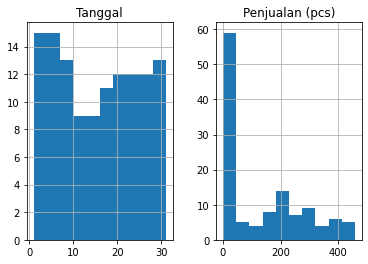

In [11]:
_ = sales_df.hist()

In [12]:
#Get the sales and time step from dataframe
temp = sales_df['Penjualan (pcs)']
sales = np.array(temp.tolist())
time = np.array([i[0] for i in enumerate(sales)])

In [13]:
#Helper function for plotting dataset
def plot_dataset(time, series, title, xlabel, ylabel, color='b'):
  plt.plot(time, series, '{}-'.format(color))
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid=True

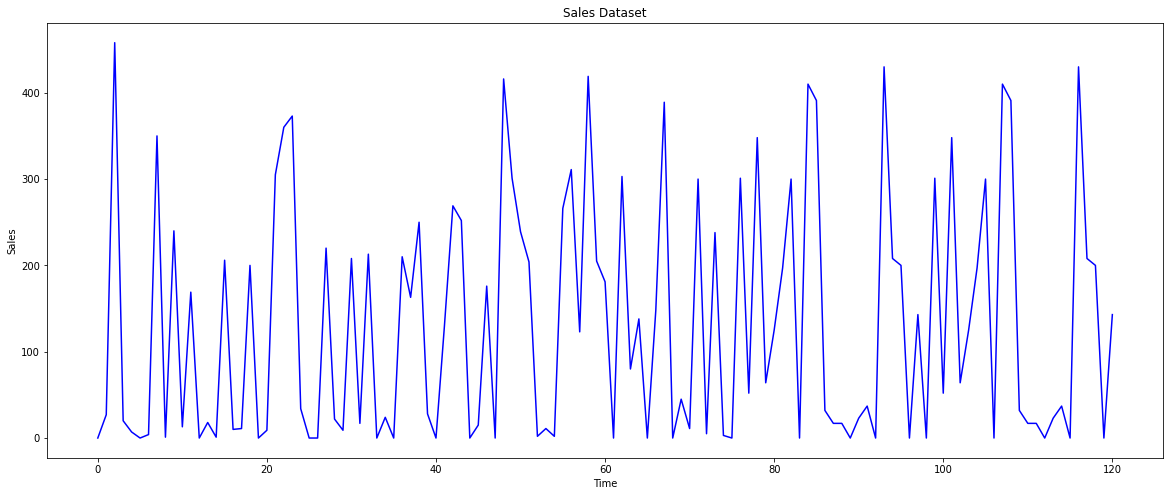

In [14]:
#Plot the dataset
plt.figure(figsize=(20, 8))
plot_dataset(time=time, series=sales, color='b', title='Sales Dataset', xlabel='Time', ylabel='Sales')

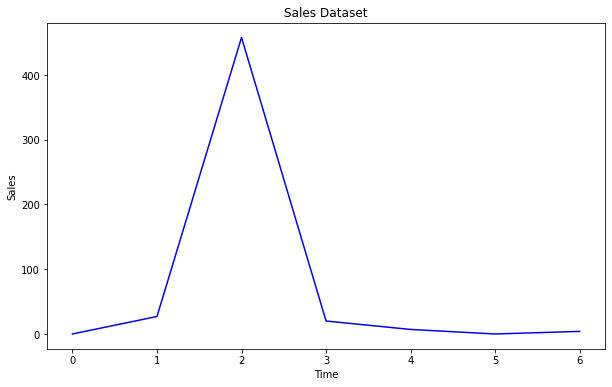

In [15]:
plt.figure(figsize=(10, 6))
plot_dataset(time=time[:7], series=sales[:7], color='b', title='Sales Dataset', xlabel='Time', ylabel='Sales')

Split Train and Test

In [16]:
#Split dataset with 80% of training and the rest for testing
split = round(0.8*len(sales))
train_sales = sales[:split]
train_time = time[:split]
test_sales = sales[split:]
test_time = time[split:]

Window the Dataset 

In [17]:
#Helper function for windowing the dataset
def dataset_window(list, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(temp, axis=-1)
  data_window = tf.data.Dataset.from_tensor_slices(series)
  data_window = data_window.window(window_size + 1, shift = 1, drop_remainder= True)
  data_window = data_window.flat_map(lambda x: x.batch(window_size+1))
  data_window = data_window.shuffle(shuffle_buffer)
  data_window = data_window.map(lambda x: (x[:-1], x[1:]))
  data_window = data_window.batch(batch_size).prefetch(1)
  return data_window

Function for Forecasting the Model for Fit It Into the Plotted Graph

In [18]:
#Helper function for forecasting
def forecast_model(model, series, window_size):
  data_forecast = tf.data.Dataset.from_tensor_slices(series)
  data_forecast = data_forecast.window(window_size, shift=1, drop_remainder=True)
  data_forecast = data_forecast.flat_map(lambda x: x.batch(window_size))
  data_forecast = data_forecast.batch(32).prefetch(1)
  print(data_forecast)
  forecast = model.predict(data_forecast)
  return forecast

Window Size, Batch Size, & Shuffle Buffer

In [19]:
window_size = 7
batch_size = 128
shuffle_buffer = 130

Build the Model

In [20]:
#Building model with learning rate scheduler, so we can pick the best learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = dataset_window(train_sales, window_size, batch_size, shuffle_buffer)

print(train_set)
print(train_sales.shape)

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                                 padding='causal', activation='relu',
                                 input_shape=[None,1]),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Lambda(lambda x : abs(x*max))
])
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda x: 1e-10 * 10**(x/20))
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-10, momentum=0.9),
              metrics=['mae'])
history = model.fit(train_set, epochs=300, callbacks=[learning_rate_scheduler])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float32, tf.float32)>
(97,)
Epoch 1/300
1/1 [==============================] - 34s 34s/step - loss: 126.1166 - mae: 126.6138
Epoch 2/300
1/1 [==============================] - 0s 19ms/step - loss: 126.1166 - mae: 126.6138
Epoch 3/300
1/1 [==============================] - 0s 20ms/step - loss: 126.1166 - mae: 126.6138
Epoch 4/300
1/1 [==============================] - 0s 19ms/step - loss: 126.1165 - mae: 126.6138
Epoch 5/300
1/1 [==============================] - 0s 22ms/step - loss: 126.1165 - mae: 126.6138
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 126.1165 - mae: 126.6137
Epoch 7/300
1/1 [==============================] - 0s 26ms/step - loss: 126.1164 - mae: 126.6137
Epoch 8/300
1/1 [==============================] - 0s 27ms/step - loss: 126.1164 - mae: 126.6136
Epoch 9/300
1/1 [==============================] - 0s 18ms/step - loss: 126.1163 - mae: 126.6136
Epoch 10/300
1/1 [=========

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense (Dense)                (None, None, 32)          2080      
_________________________________________________________________
dense_1 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           17        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

(1e-06, 0.1, 90.0, 140.0)

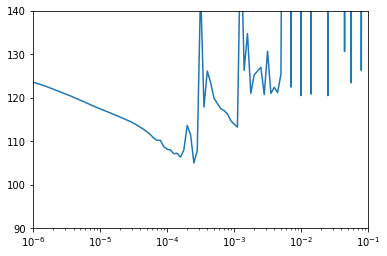

In [22]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-1, 90, 140])

In [23]:
#Build the final model with the best learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = dataset_window(train_sales, window_size, batch_size, shuffle_buffer)
print(train_set)
print(train_sales.shape)

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1,
                                 padding='causal', activation='relu',
                                 input_shape=[None,1]),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Lambda(lambda x : abs(x*max))
])
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.8),
              metrics=['mae'])
history = model.fit(train_set, epochs=200)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float32, tf.float32)>
(97,)
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 126.1166 - mae: 126.6138
Epoch 2/200
1/1 [==============================] - 0s 19ms/step - loss: 125.3917 - mae: 125.8874
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 124.2272 - mae: 124.7260
Epoch 4/200
1/1 [==============================] - 0s 18ms/step - loss: 122.9845 - mae: 123.4831
Epoch 5/200
1/1 [==============================] - 0s 21ms/step - loss: 121.8266 - mae: 122.3262
Epoch 6/200
1/1 [==============================] - 0s 26ms/step - loss: 120.9715 - mae: 121.4699
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 120.2264 - mae: 120.7254
Epoch 8/200
1/1 [==============================] - 0s 23ms/step - loss: 119.5967 - mae: 120.0952
Epoch 9/200
1/1 [==============================] - 0s 19ms/step - loss: 119.0411 - mae: 119.5409
Epoch 10/200
1/1 [===========

In [24]:
#Forecasting the testing data
rnn_forecast = forecast_model(model, sales[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split - window_size:-1, -1, 0]

<PrefetchDataset shapes: (None, None, 1), types: tf.float64>


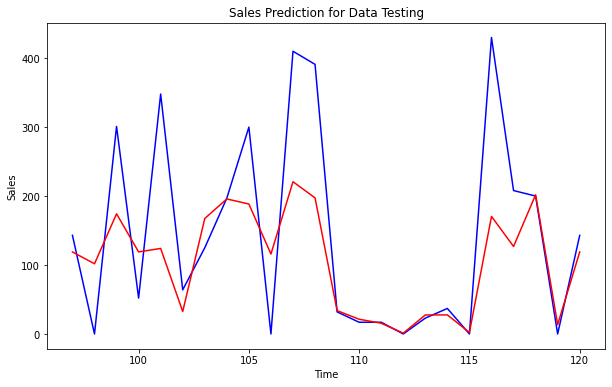

In [25]:
#Plotting the testing data
plt.figure(figsize=(10, 6))
plot_dataset(time=test_time, series=test_sales, title='Sales Prediction for Data Testing',xlabel='Time', ylabel='Sales')
plot_dataset(time=test_time, series=rnn_forecast, title='Sales Prediction for Data Testing', xlabel='Time', ylabel='Sales', color='r')

<Figure size 432x288 with 0 Axes>

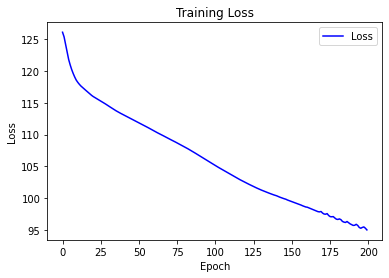

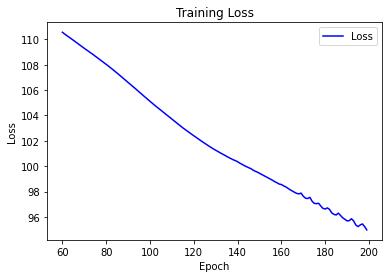

<Figure size 432x288 with 0 Axes>

In [26]:
#Plotting and examining the training loss
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']

epoch_num=range(len(loss))

plot_dataset(epoch_num, loss, title='Training Loss', xlabel='Epoch', ylabel='Loss')
plt.legend(["Loss"])
plt.figure()

loss_zoom = loss[60:]
epoch_num_zoom = [x+60 for x in range(len(loss_zoom))]

plot_dataset(epoch_num_zoom, loss_zoom, title='Training Loss', xlabel='Epoch', ylabel='Loss')
plt.legend(["Loss"])
plt.figure()

In [27]:
rnn_forecast

array([118.95102  , 101.81097  , 174.27248  , 118.956726 , 124.071075 ,
        32.572952 , 167.4542   , 195.81451  , 188.45407  , 115.940704 ,
       220.78137  , 197.35472  ,  33.857624 ,  21.355219 ,  15.611545 ,
         1.1478739,  27.584717 ,  27.66249  ,   2.1731396, 170.52795  ,
       126.891846 , 201.8578   ,  13.5882   , 118.95102  ], dtype=float32)

In [28]:
temp = train_sales[-21:]
print(temp)

[301.  52. 348.  64. 125. 197. 300.   0. 410. 391.  32.  17.  17.   0.
  23.  37.   0. 430. 208. 200.   0.]


In [29]:
test = np.array([])
rnn_forecast = forecast_model(model, temp[..., np.newaxis],len(temp)).tolist()
rnn_forecast

<PrefetchDataset shapes: (None, None, 1), types: tf.float64>


[[[46.760250091552734],
  [155.95127868652344],
  [54.8733024597168],
  [134.9114990234375],
  [186.9047393798828],
  [187.95599365234375],
  [115.94070434570312],
  [234.51187133789062],
  [183.20872497558594],
  [64.4290771484375],
  [72.0519790649414],
  [71.66209411621094],
  [59.323524475097656],
  [38.853790283203125],
  [34.347843170166016],
  [24.95608901977539],
  [64.68248748779297],
  [80.15296173095703],
  [128.68646240234375],
  [0.7769820690155029],
  [87.43306732177734]]]

In [30]:
round(rnn_forecast[-1][-1][0])

87

In [31]:
model.predict([[[0]]])

array([[[53.828453]]], dtype=float32)

In [32]:
model.save("sales_model")

INFO:tensorflow:Assets written to: sales_model/assets


INFO:tensorflow:Assets written to: sales_model/assets


In [33]:
!zip -r sales_model.zip sales_model

  adding: sales_model/ (stored 0%)
  adding: sales_model/assets/ (stored 0%)
  adding: sales_model/keras_metadata.pb (deflated 91%)
  adding: sales_model/saved_model.pb (deflated 90%)
  adding: sales_model/variables/ (stored 0%)
  adding: sales_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: sales_model/variables/variables.index (deflated 68%)
